In [7]:
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
from urllib.request import urlopen

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [2]:
#Retrieving exemplary corpora

corpus_name = "/Users/shiyipeng/Downloads/internet_archive_scifi_v3.txt"
text = open(corpus_name)
text = text.read()

def clean_raw_text(text):
    words_li = []
    #text = text.decode("utf-8")
    clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d").replace("#","")
    words = clean_text.split(' ')
    for word in words:
        words_li.append(word)
    return words_li[:10000], clean_text[:10000]

words = clean_raw_text(text)[0]
text = clean_raw_text(text)[1]

In [3]:
import en_core_web_sm
nlp = en_core_web_sm.load()

def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

tokens = word_tokenize(text)
print(tokens[:100])

['MARCH', 'All', 'Stories', 'New', 'and', 'Complete', 'Publisher', 'Editor', 'IF', 'is', 'published', 'bi', 'monthly', 'by', 'Quinn', 'Publishing', 'Company', 'Inc.', 'Kingston', 'New', 'York', 'Volume', 'No', 'Copyright', 'by', 'Quinn', 'Publishing', 'Company', 'Inc.', 'Application', 'for', 'Entry', 'as', 'Second', 'Class', 'matter', 'at', 'Post', 'Office', 'Buffalo', 'New', 'York', 'pending', 'Subscription', 'for', 'issues', 'in', 'U.S.', 'and', 'Possessions', 'Canada', 'for', 'issues', 'elsewhere', 'Aiiow', 'four', 'weeks', 'for', 'change', 'of', 'address', 'All', 'stories', 'appearing', 'in', 'this', 'magazine', 'are', 'fiction', 'Any', 'similarity', 'to', 'actual', 'persons', 'is', 'coincidental', 'c', 'a', 'fcopy', 'Printed', 'ia', 'U.S.', 'A.', 'A', 'chat', 'with', 'the', 'editor', 'i', 'science', 'fiction', 'magazine', 'called', 'IF', 'The', 'title', 'was', 'selected', 'after', 'much']


In [8]:
#Counting Words

def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(words)

In [9]:
#Doing this in place (changing the original DataFrame) as we don't need the unsorted DataFrame
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

,word,count
72,the,479
65,a,257
51,of,255
5,and,245
60,to,243
...,...,...
719,know,14
237,way,14
1073,heard,14
325,around,14


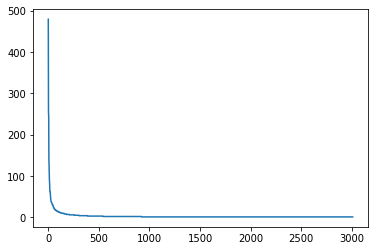

In [10]:
#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

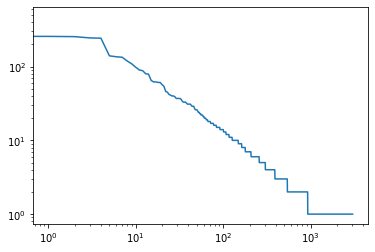

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [12]:
import nltk
sfText = nltk.Text(tokens)
sfIndex = nltk.text.ConcordanceIndex(sfText) 
sfIndex.print_concordance('magazine')

Displaying 9 of 9 matches:
dress All stories appearing in this magazine are fiction Any similarity to actua
t with the editor i science fiction magazine called IF The title was selected af
ias gone into the formation of this magazine We have had the aid of several very
ket t a great public demand for our magazine In short why will you buy IF We can
ause you like its personality Every magazine we feel does have a definite person
rent from any other science fiction magazine on the stands while still building 
not copied any feature of any other magazine We will not for instance review fan
an a happy ending that IF will be a magazine given over to tragedy W e will only
 day IF went on the science fiction magazine your money could buy It has the bes


In [13]:
sfText.common_contexts(['magazine'])

this_are fiction_called this_we our_in every_we fiction_on other_we
a_given fiction_your


In [14]:
sfText.count('Canada')

1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[ke

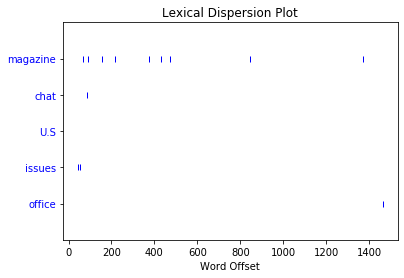

In [15]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
sfText.dispersion_plot(['magazine','chat', 'U.S', 'issues','office'])
sns.set() #Re-enabling seaborn

In [23]:
#Filtering and Normalizing
countsDict = {}
for word in tokens:
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
print(word_counts[:20])

stop_words_freq = []
for word, count in word_counts:
    if word == 'science':
        break
    else:
        stop_words_freq.append(word)
print(stop_words_freq)

[('the', 85), ('of', 62), ('a', 50), ('to', 36), ('and', 34), ('we', 26), ('in', 25), ('you', 19), ('his', 19), ('for', 18), ('it', 17), ('will', 17), ('is', 16), ('he', 16), ('as', 13), ('have', 13), ('with', 12), ('on', 12), ('not', 12), ("'s", 12)]
['the', 'of', 'a', 'to', 'and', 'we', 'in', 'you', 'his', 'for', 'it', 'will', 'is', 'he', 'as', 'have', 'with', 'on', 'not', "'s", 'IF', 'fiction', 'that', 'We', 'by', 'The', 'magazine', 'from', 'an', 'A', 'be', 'one', 'man']


In [39]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))
    return normalized

normalized_tokens = {}
normalized_tokens['tokens'] = normalizeTokens(tokens)

countsDict = {}
for word in normalized_tokens['tokens']:
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
#print(word_counts)

count_df = pandas.DataFrame(word_counts)
print(count_df)


           0   1
0      story  12
1    science   7
2       time   7
3       good   7
4     writer   7
..       ...  ..
534  tearing   1
535      sob   1
536  slender   1
537    frame   1
538        o   1

[539 rows x 2 columns]


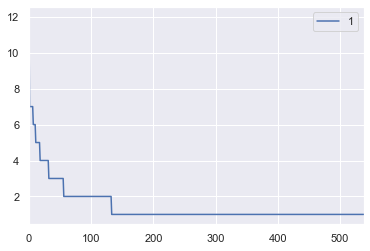

In [40]:
count_df.plot()

801


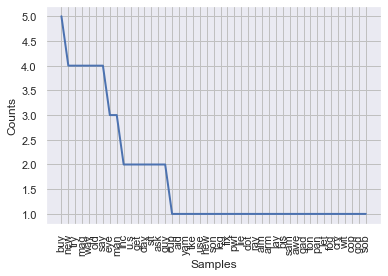

In [50]:
sci_dist = nltk.ConditionalFreqDist(((len(w), w) for w in normalized_tokens['tokens']))
print(sci_dist.N())
sci_dist[3].plot()

In [51]:
sci_pdist = nltk.ConditionalProbDist(sci_dist, nltk.ELEProbDist)
#print the most common 2 letter word
print(sci_pdist[2].max())

#And its probability
print(sci_pdist[2].prob(sci_pdist[2].max()))

go
0.21212121212121213


In [58]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

count_df['normalized_tokens_POS'] = [spacy_pos(t) for t in count_df.iloc[:,0]]
sci_dist_WordtoPOS = nltk.ConditionalFreqDist(count_df['normalized_tokens_POS'].sum())
list(sci_dist_WordtoPOS.items())[:10]


[('story', FreqDist({'NN': 1})),
 ('science', FreqDist({'NN': 1})),
 ('time', FreqDist({'NN': 1})),
 ('good', FreqDist({'JJ': 1})),
 ('writer', FreqDist({'NN': 1})),
 ('howard', FreqDist({'NNP': 1})),
 ('tell', FreqDist({'VB': 1})),
 ('great', FreqDist({'JJ': 1})),
 ('feel', FreqDist({'VB': 1})),
 ('like', FreqDist({'IN': 1}))]

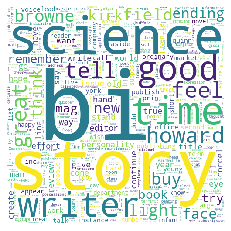

In [66]:

#sci_dist_POStoWord = nltk.ConditionalProbDist(sci_dist_POStoWord, nltk.ELEProbDist)
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(count_df.iloc[:,0]))
plt.imshow(wc)
plt.axis("off")
plt.savefig("scifi_word_cloud.pdf", format = 'pdf')
                                                                                                   


In [ ]:
#Exercise 4

In [67]:
sent = nlp(u"Tom went to IKEA to get some of those delicious Swedish meatballs.")
for token in sent:
    print(token.text, token.pos_, token.tag_)

Tom PROPN NNP
went VERB VBD
to ADP IN
IKEA PROPN NNP
to PART TO
get AUX VB
some DET DT
of ADP IN
those DET DT
delicious ADJ JJ
Swedish ADJ JJ
meatballs NOUN NNS
. PUNCT .


In [69]:
DF = pandas.read_csv("/Users/shiyipeng/Documents/geo_analysis2.csv")
DF.head

<bound method NDFrame.head of     Unnamed: 0                   id  \
0            0  1250263302120374274   
1            1  1250262920132538368   
2            2  1250262559359471616   
3            3  1250261970604797959   
4            4  1250261634108600320   
..         ...                  ...   
95          95  1250208632257429505   
96          96  1250208320184553472   
97          97  1250208018823692291   
98          98  1250207526865342464   
99          99  1250207217279778818   

                                                 text  \
0   Excited for the future when we all study gentr...   
1   @lalaleahabel Methadone mile has clapped back ...   
2   They warned y’all coons about gentrification n...   
3   @BigAlDodgerfan Oh yeah, my bro told me about ...   
4   RT @radicarol: very informative &amp; interact...   
..                                                ...   
95  @rewFer @maccoinnich I mean, gentrification is...   
96  RT @Pramas: The Time Traveler's Codex for

In [71]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

DF['sentences'] = DF['text'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])
DF.head

<bound method NDFrame.head of     Unnamed: 0                   id  \
0            0  1250263302120374274   
1            1  1250262920132538368   
2            2  1250262559359471616   
3            3  1250261970604797959   
4            4  1250261634108600320   
..         ...                  ...   
95          95  1250208632257429505   
96          96  1250208320184553472   
97          97  1250208018823692291   
98          98  1250207526865342464   
99          99  1250207217279778818   

                                                 text  \
0   Excited for the future when we all study gentr...   
1   @lalaleahabel Methadone mile has clapped back ...   
2   They warned y’all coons about gentrification n...   
3   @BigAlDodgerfan Oh yeah, my bro told me about ...   
4   RT @radicarol: very informative &amp; interact...   
..                                                ...   
95  @rewFer @maccoinnich I mean, gentrification is...   
96  RT @Pramas: The Time Traveler's Codex for

In [73]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

DF['POS_sents'] = DF['sentences'].apply(lambda x: tag_sents_pos(x))
DF['POS_sents']

0     [[(Excited, VBN), (for, IN), (the, DT), (futur...
1     [[(@lalaleahabel, NNP), (Methadone, NNP), (mil...
2     [[(They, PRP), (warned, VBD), (y, NNP), (’, ''...
3     [[(@BigAlDodgerfan, NNP)], [(Oh, UH)], [(yeah,...
4     [[(RT, NNP), (@radicarol, NNP), (very, RB), (i...
                            ...                        
95    [[(@rewFer, NNP)], [(@maccoinnich, NNP)], [(I,...
96    [[(RT, NNP), (@Pramas, NNP)], [(The, DT), (Tim...
97    [[(@BETNews, NNP), (@BET, $), (@Essence, CD), ...
98    [[(It, PRP), (’s, VBZ), (not, RB)], [(just, RB...
99    [[(RT, NNP), (@tylasade, NNP)], [(I, PRP), (ha...
Name: POS_sents, Length: 100, dtype: object

In [74]:
countTarget = 'NN'
targetCounts = {}
for entry in DF['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('gentrification', 63),
 ('housing', 7),
 ('amp', 6),
 ('way', 6),
 ('man', 5),
 ('legend', 4),
 ('owner', 4),
 ('ppl', 4),
 ('today', 4),
 ('policy', 4),
 ('guide', 3),
 ('energy', 3),
 ('h', 3),
 ('reason', 3),
 ('capitalism', 3),
 ('tech', 3),
 ('institution', 3),
 ('racism', 3),
 ('section', 3),
 ('history', 3)]

In [76]:
NTarget = 'JJ'
Word = 'city'
NResults = set()
for entry in DF['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'former'}


In [78]:
#Exercise 5
Bigrams = nltk.collocations.BigramCollocationFinder.from_words(count_df.iloc[:,0].sum())
print("There are {} bigrams in the finder".format(Bigrams.N))


There are 3184 bigrams in the finder


In [79]:
def bigramScoring(count, wordsTuple, total):
    return count

print(Bigrams.nbest(bigramScoring, 10))

[('r', 'e'), ('i', 'n'), ('e', 'r'), ('a', 'r'), ('e', 'a'), ('o', 'n'), ('t', 'e'), ('e', 's'), ('l', 'e'), ('a', 't')]


In [80]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

Bigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  183, The second word is: 218
The first word is:  218, The second word is: 184
The first word is:  184, The second word is: 249
The first word is:  249, The second word is: 89
The first word is:  89, The second word is: 183
The first word is:  183, The second word is: 124
The first word is:  124, The second word is: 240
The first word is:  240, The second word is: 393
The first word is:  393, The second word is: 200
The first word is:  200, The second word is: 124


In [81]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
Bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]

[(('i', 'n'), 90.71914392464943),
 (('l', 'y'), 76.46180048547248),
 (('o', 'n'), 58.75807570587229),
 (('n', 'g'), 50.35093565533436),
 (('v', 'e'), 40.36635429904639),
 (('c', 'o'), 34.765732967547024),
 (('b', 'l'), 33.90101230122686),
 (('q', 'u'), 33.60177762745389),
 (('a', 'r'), 33.43550549492331),
 (('e', 'e'), 33.369249565458695),
 (('a', 'a'), 33.19267953321488),
 (('e', 'i'), 32.363659648129484),
 (('i', 'i'), 31.06502643557694),
 (('r', 'e'), 30.461891936445554),
 (('t', 'h'), 28.395898108902912),
 (('n', 'd'), 26.421184091309932),
 (('n', 'r'), 25.892698068024792),
 (('s', 't'), 25.423769324641768),
 (('n', 't'), 23.531969240349305),
 (('t', 'n'), 21.829781067631078),
 (('d', 'e'), 20.461508267051897),
 (('o', 'a'), 20.04509955600153),
 (('o', 'r'), 19.293771754505954),
 (('e', 'r'), 18.648623455839832),
 (('u', 'r'), 18.617532865571164),
 (('i', 'e'), 18.12694069866469),
 (('s', 'n'), 17.348604863506225),
 (('e', 'o'), 17.179353277503182),
 (('h', 'o'), 16.22752361846168)

In [83]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
Trigrams = nltk.collocations.TrigramCollocationFinder.from_words(count_df.iloc[:,0].sum())
Trigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('i', 'o', 'n'), 4.037299206256547),
 (('i', 'n', 'g'), 4.034683411874016),
 (('t', 'i', 'o'), 3.6277983950965362),
 (('t', 'e', 'r'), 3.612744234836283),
 (('e', 's', 's'), 3.5377841394751575),
 (('u', 'r', 'e'), 3.450142857614115),
 (('e', 'n', 't'), 3.436580783768213),
 (('a', 't', 'i'), 3.3789024363669062),
 (('t', 'u', 'r'), 3.134196653171381),
 (('s', 't', 'a'), 3.004577172822271),
 (('i', 'v', 'e'), 2.900760081816116),
 (('e', 'a', 'd'), 2.7721672397998263),
 (('a', 'l', 'l'), 2.6976071008833955),
 (('i', 't', 'y'), 2.666034376986726),
 (('y', 'r', 'e'), 2.524694955069243),
 (('e', 'c', 'o'), 2.5157177170773477),
 (('h', 'e', 'a'), 2.5004084425171222),
 (('l', 'y', 'r'), 2.491248700419021),
 (('n', 'c', 'e'), 2.488525594671361),
 (('e', 's', 't'), 2.48449514374637)]

In [86]:
Ngrams = nltk.ngrams(count_df.iloc[:,0].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('e', 'n', 'c', 'e'): 2, ('n', 'c', 'e', 't'): 2, ('w', 'r', 'i', 't'): 2, ('r', 'i', 't', 'e'): 2, ('i', 't', 'e', 'r'): 2, ('t', 'e', 'r', 'h'): 2, ('g', 'r', 'e', 'a'): 2, ('r', 'e', 'a', 't'): 3, ('e', 'a', 't', 'f'): 2, ('l', 'i', 'g', 'h'): 2, ('i', 'g', 'h', 't'): 5, ('g', 'h', 't', 't'): 2, ('t', 'h', 'i', 'n'): 3, ('i', 'e', 'l', 'd'): 2, ('r', 'o', 'w', 'n'): 2, ('e', 'n', 'd', 'i'): 2, ('n', 'd', 'i', 'n'): 3, ('d', 'i', 'n', 'g'): 3, ('r', 'k', 'n', 'e'): 2, ('r', 'e', 'm', 'e'): 2, ('m', 'b', 'e', 'r'): 4, ('p', 'e', 'r', 's'): 4, ('e', 'r', 's', 'o'): 3, ('r', 's', 'o', 'n'): 3, ('s', 'o', 'n', 'a'): 2, ('o', 'n', 'a', 'l'): 4, ('r', 'e', 'v', 'i'): 2, ('v', 'i', 'e', 'w'): 2, ('a', 'n', 'd', 'c'): 2, ('n', 'd', 'c', 'o'): 3, ('c', 'o', 'r', 'd'): 2, ('o', 'r', 'd', 'e'): 3, ('r', 'd', 'e', 'l'): 2, ('e', 'd', 'i', 't'): 2, ('d', 'i', 't', 'o'): 2, ('i', 't', 'o', 'r'): 2, ('t', 'o', 'r', 'i'): 2, ('i', 's', 's', 'u'): 2, ('f', 'o', 'r', 't'): 2, ('e', 's', 't', 'a'): 6,

In [92]:
#Exercise 6
ner_text = DF['text'][0]
sent = nlp(ner_text)
for token in sent:
    print(token.text, token.ent_type_)

Excited 
for 
the 
future 
when 
we 
all 
study 
gentrification 
in 
one CARDINAL
2 FAC
square FAC
block 
area 
in 
Korea GPE
. 


In [89]:
for ent in sent.ents:
    print(ent.text, ent.label_)

one CARDINAL
2 square FAC
Korea GPE


In [93]:

def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

DF['classified_sents'] = DF['sentences'].apply(lambda x: tag_sents_ner(x))
DF['classified_sents']

0     [[(one, CARDINAL), (2 square, FAC), (Korea, GP...
1                                                  [[]]
2                                                  [[]]
3                              [[], [], [], [], [], []]
4     [[(RT @radicarol, ORG), (Charlottesville, ORG)...
                            ...                        
95                                     [[], [], [], []]
96    [[], [(today, DATE)], [(NYC, ORG), (the 80s, D...
97                                     [[], [], [], []]
98                             [[], [], [], [], [], []]
99                                             [[], []]
Name: classified_sents, Length: 100, dtype: object

In [94]:
entityCounts = {}
for entry in DF['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('RT', 6),
 ('New York', 4),
 ('R.I.P.', 4),
 ('Jimmy Web Trash and Vaudevilles', 4),
 ('LA', 4),
 ('today', 4),
 ('Henderson', 3),
 ('first', 3),
 ('one', 2),
 ('Charlottesville', 2)]

In [97]:
#Exercise 7
from spacy import displacy
doc = nlp(ner_text)
displacy.render(doc, style='dep')
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

the future future pobj for
we we nsubj study
gentrification gentrification dobj study
one 2 square block area area pobj in
Korea Korea pobj in


In [98]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Excited ROOT Excited VERB [for, study, .]
for prep Excited VERB [future]
the det future NOUN []
future pobj for ADP [the]
when advmod study VERB []
we nsubj study VERB [all]
all appos we PRON []
study advcl Excited VERB [when, we, gentrification, in]
gentrification dobj study VERB []
in prep study VERB [area]
one nummod area NOUN []
2 nummod area NOUN []
square amod area NOUN []
block compound area NOUN []
area pobj in ADP [one, 2, square, block, in]
in prep area NOUN [Korea]
Korea pobj in ADP []
. punct Excited VERB []


In [100]:
from spacy.symbols import nsubj, VERB
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{study}


In [136]:
negative_ex = {}
for index, row in DF.iterrows():
    text = ' '.join(row['text'])

    negative_ex[row['location']] = ([],[])
    doc = nlp(text)
    #print(doc)
    for chunk in doc.noun_chunks:
        
        subject = 0
        object_ = 0
        if chunk.root.head.text == 'L':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                negative_ex[row['location']][0].append(subject)
            if object_ is not 0:
                negative_ex[row['location']][1].append(object_)
negative_ex

# I dont know why the text cannot keep right format here

{'Michigan, USA': ([], []),
 'Massachusetts, USA': ([], []),
 'SATURN ': ([], []),
 'New York, USA': ([], []),
 nan: ([], []),
 'metro Washington, D.C.': ([], []),
 'Chicago, IL': ([], []),
 'babyworld': ([], []),
 'Brooklyn, NY': ([], []),
 'Wairarapa, NZ': ([], []),
 'VIRGINIA': ([], []),
 'North Carolina, USA': ([], []),
 'New York, NY': ([], []),
 'San Francisco, CA': ([], []),
 'Inland Empire, CA': ([], []),
 'Washington, D.C.': ([], []),
 'In Your Ears...': ([], []),
 'Arizona': ([], []),
 'Dallas, TX': ([], []),
 'h€ll': ([], []),
 'On to better things': ([], []),
 'The Crystal Cave': ([], []),
 'dakota city': ([], []),
 'Kenner,Louisiana': ([], []),
 'East Flatbush Brooklyn, NY': ([], []),
 'www.democracynow.org': ([], []),
 'New Orleans, LA': ([], []),
 'Silicon Valley, CA': ([], []),
 'Bryan Tx': ([], []),
 'Los Angeles, CA': ([], []),
 'Atlanta, GA': ([], []),
 'NAWF. .. (#916.)': ([], []),
 'Bangkok, Thailand': ([], []),
 'Hellesdon, England': ([], []),
 '713/647': ([], [])